In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [4]:
# Data from N-2 rocket
# Tana is the first rocket launched
# It went up to around 80m
df = pd.read_csv('tanafull.csv')

In [5]:
df

,altitude,filtered_a,filtered_s,filtered_v,gx,gy,gz,latitude,longitude,state,temperature
0,1272.909,0.014,1273.154,0.064,-0.001,0.018,0.017,0,0,0,44.983
1,1272.909,0.014,1273.154,0.064,-0.001,0.018,0.017,0,0,0,44.983
2,1272.901,0.012,1273.140,0.057,-0.010,0.019,0.017,0,0,0,44.983
3,1272.901,0.012,1273.140,0.057,-0.010,0.019,0.017,0,0,0,44.983
4,1272.820,0.010,1273.120,0.047,0.001,0.019,0.017,0,0,0,44.974
...,...,...,...,...,...,...,...,...,...,...,...
1826,1284.050,-5.711,1283.788,-27.098,-8.731,-0.286,0.436,0,0,3,45.836
1827,1284.050,-5.711,1283.788,-27.098,-8.731,-0.286,0.436,0,0,3,45.836
1828,1283.649,-5.698,1281.238,-27.597,-8.731,-0.435,1.262,0,0,4,45.774
1829,1283.649,-5.698,1281.238,-27.597,-8.731,-0.435,1.262,0,0,4,45.774


In [27]:
# Trim the data frame
# Kalman filtered Altitude
df2 = df['filtered_s'][1600:]
v = df['filtered_v'][1600:]

<AxesSubplot:>

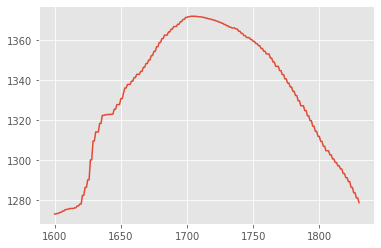

In [7]:
# See the data looks like
df2.plot()

<AxesSubplot:>

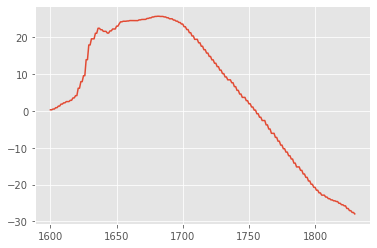

In [28]:
v.plot()

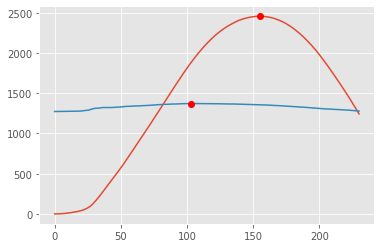

In [44]:
import scipy.integrate as it
p = it.cumtrapz(v,initial=0)
plt.plot(p,label='integral of velocity')
plt.plot(np.argmax(p),max(p),'ro')
plt.plot(np.array(df2), label='Altitude from KF')
plt.plot(np.argmax(np.array(df2)),max(np.array(df2)),'ro')

# plt.yscale('log')
# plt.ylim([1200,2200])

In [33]:
df2

1600    1273.243
1601    1273.243
1602    1273.500
1603    1273.500
1604    1274.040
          ...   
1826    1283.788
1827    1283.788
1828    1281.238
1829    1281.238
1830    1278.865
Name: filtered_s, Length: 231, dtype: float64

In [8]:
# Apogee detection algorithm 1
# If there is 5 times consecutive decrease in altitude, it is recognized as the apogee.
def detect(xs,MAX_COUNT):
    last = xs[0]
    # MAX_COUNT = 1
    indicator = MAX_COUNT
    print(indicator,end=',')
    for i,cur in enumerate(xs[1:]):
        if (cur > last):
            if (indicator < MAX_COUNT):
                indicator = MAX_COUNT
                print(indicator,end=',')
        if (cur < last):
            indicator -= 1
            print(indicator,end=',')
            if indicator == 0:
                print()
                print("Apogee detected at {0} frame. Apogee: {1} [m]".format(i+1,cur))
                return(i+1,cur)
        last = cur

In [9]:
# Test the logic
alt = np.array(df2)
true_apogee_index = np.argmax(alt)
true_apogee = max(alt)
counters=[]
delay_frames=[]
delays=[]
for i in [5,4,3,2,1]:
    [frame,apogee] = detect(alt, i)
    delay = (frame-true_apogee_index)*sampling_period
    delay_frame = frame-true_apogee_index
    print("Delay frames: {0}:".format(delay_frame))
    print("Delay second: {0:.2f}[sec]".format(delay))
    delay_frames.append(delay_frame)
    delays.append(delay)
dic = {"count": [5,4,3,2,1], "delays [sec]": delays, "delay_frames": delay_frames}
delay_df = pd.DataFrame(data=dic)
delay_df

5,4,3,2,1,0,
Apogee detected at 114 frame. Apogee: 1371.066 [m]


NameError: name 'sampling_period' is not defined

5,4,3,2,1,0,
Apogee detected at 114 frame. Apogee: 1371.066 [m]



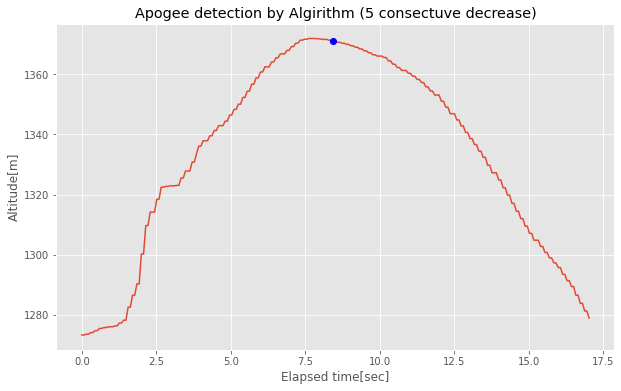

In [12]:
fig, ax = plt.subplots(1, 1,figsize=(10,6))
alt = np.array(df2)
n_sample = len(alt)
# sampling_period = 0.2
sampling_period = 0.074
# 74ms
t = np.arange(0,n_sample*sampling_period,sampling_period)
ax.plot(t,alt)


COUNT = 5
[frame,apogee] = detect(alt, COUNT)
x = sampling_period*frame
y = df2.iloc[frame]
ax.plot(x,y,'bo')

plt.xlabel('Elapsed time[sec]')
plt.ylabel('Altitude[m]')
plt.title("Apogee detection by Algirithm ({0} consectuve decrease)".format(COUNT))
print()

In [25]:
# Apogee detection algorithm 1
# If there is 5 times consecutive decrease in altitude, it is recognized as the apogee.
def detect2(xs,DISTANCE):
    last = xs[0]
    for i,cur in enumerate(xs[1:]):
        dist = last - cur
        print(dist)
        if (dist > DISTANCE):
            print("Apogee detected at {0} frame. Apogee: {1} [m]".format(i+1,cur))
            return(i+1,cur)
        last = cur        

0.0
-0.25700000000006185
0.0
-0.5399999999999636
0.0
-0.6240000000000236
0.0
-0.7539999999999054
0.0
-0.27500000000009095
0.0
-0.28099999999994907
0.0
0.0
-0.28700000000003456
0.0
-0.9670000000000982
0.0
-0.9389999999998508
0.0
-4.317999999999984
0.0
-4.005000000000109
0.0
-3.7829999999999018
0.0
-9.951000000000022
0.0
-9.448000000000093
0.0
-4.489000000000033
0.0
0.0
-4.267000000000053
0.0
-4.023999999999887
0.0
-0.2639999999998963
0.0
-0.19100000000003092
0.0
0.0
-0.13400000000001455
0.0
-2.4680000000000746
0.0
-2.321999999999889
0.0
0.0
-2.95900000000006
0.0
-2.754000000000133
-2.571999999999889
0.0
-1.7829999999999018
0.0
0.0
-1.6460000000001855
0.0
-1.7709999999999582
0.0
-1.6199999999998909
0.0
0.0
-1.4780000000000655
0.0
-2.0450000000000728
0.0
-1.884999999999991
0.0
-1.7290000000000418
0.0
-2.2569999999998345
0.0
-2.0790000000001783
0.0
-2.3019999999999072
0.0
-2.122000000000071
0.0
-1.9510000000000218
0.0
-1.7409999999999854
0.0
0.0
-1.5839999999998327
0.0
-1.4220000000000255


TypeError: cannot unpack non-iterable NoneType object

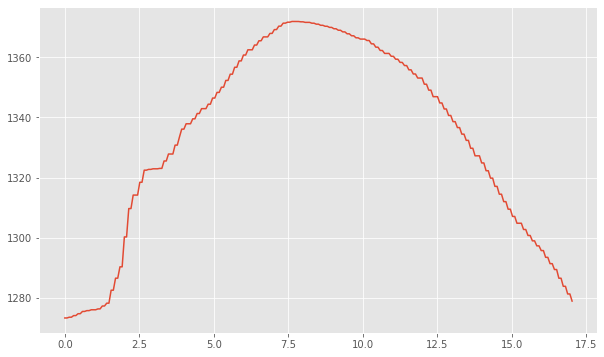

In [26]:
fig, ax = plt.subplots(1, 1,figsize=(10,6))
alt = np.array(df2)
n_sample = len(alt)
# sampling_period = 0.2
sampling_period = 0.074
# 74ms
t = np.arange(0,n_sample*sampling_period,sampling_period)
ax.plot(t,alt)


DISTANCE = 5
[frame,apogee] = detect2(alt, DISTANCE)
x = sampling_period*frame
y = df2.iloc[frame]
ax.plot(x,y,'bo')

plt.xlabel('Elapsed time[sec]')
plt.ylabel('Altitude[m]')
plt.title("Apogee detection by Algirithm ({0}m decrease)".format(DISTANCE))
print()

apogee detected 4 6


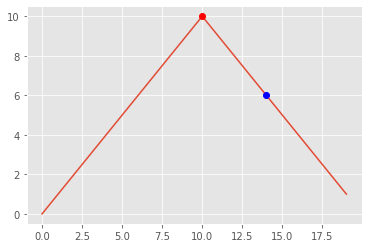

In [62]:
# To test the algorithm
# Compare the current altitude with the temporary apogee
# If there is a drop defined by threshold (i.e., 5m), it is set as the apogee
import matplotlib.pyplot as plt
xs = [0,1,2,3,4,5,6,7,8,9,10,9,8,7,6,5,4,3,2,1]

last = xs[0]
tmp_apogee = xs[0]
tmp_apogee_index = 0
ap_index = 0
for i,cur in enumerate(xs[1:]):
    if cur > tmp_apogee:
        ÷ = cur
        tmp_apogee_index = i+1
    difference = tmp_apogee - cur
    if difference > 3:
        ap_index = i+1
        print("apogee detected",difference,cur)
        break
plt.plot(xs)
plt.plot(tmp_apogee_index,tmp_apogee,'ro')
plt.plot(ap_index,cur,'bo')